Demonstration of `KMeans` and `GaussianMixture` based on a simulated dataset.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

from faai import mvnormal_distrib_map
from faai import get_axis_extent
from faai import generate_mvnormal_clusters

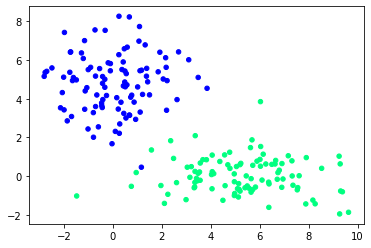

In [4]:
mu1 = np.array([0, 5])
cov1 = np.array([[2, 0], [0, 3]])

mu2 = np.array([5, 0])
cov2 = np.array([[4, 0], [0, 1]])

xs, ys, labels = generate_mvnormal_clusters((mu1, mu2), (cov1, cov2), (100, 100), seed=42)

data = {'x': xs, 'y': ys, 'label': labels}
df = pd.DataFrame(data=data)

obs_df = df[['x', 'y']]

plt.scatter(xs, ys, 20, c=labels, cmap='winter')
plt.show()

In [5]:
def visualize_two_gaussians(mu1, cov1, mu2, cov2, obs_df):

    gx1, gy1, dmap1 = mvnormal_distrib_map(mu1, cov1, obs_df)
    gx2, gy2, dmap2 = mvnormal_distrib_map(mu2, cov2, obs_df)

    plt.figure(figsize=(10, 20))
    
    plt.subplot(121)
    plt.imshow(dmap1, cmap='jet', extent=get_axis_extent(gx1, gy1))
    plt.plot(mu1[0], mu1[1], 'go')
    plt.scatter(xs[:100], ys[:100], c='w')

    plt.subplot(122)
    plt.imshow(dmap2, cmap='jet', extent=get_axis_extent(gx2, gy2))
    plt.plot(mu2[0], mu2[1], 'go')
    plt.scatter(xs[100:], ys[100:], c='w')

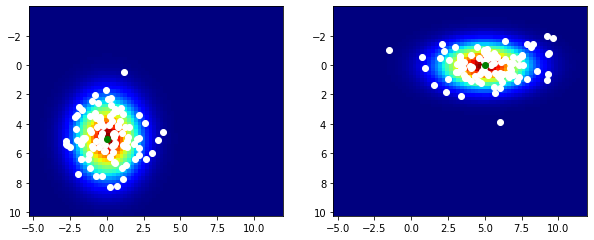

In [6]:
visualize_two_gaussians(mu1, cov1, mu2, cov2, obs_df)

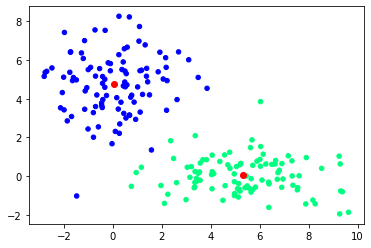

In [7]:
kmeans = KMeans(n_clusters=2).fit(obs_df)

plt.scatter(xs, ys, 20, c=kmeans.labels_, cmap='winter')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro')
plt.show()

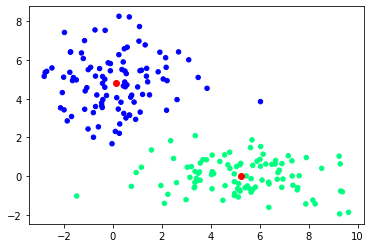

In [8]:
gmm = GaussianMixture(n_components=2, covariance_type='diag').fit(obs_df)
gmm_predicted_classes = gmm.predict(obs_df)

plt.scatter(xs, ys, 20, c=gmm_predicted_classes, cmap='winter')
plt.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'ro')
plt.show()